In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy.linalg import inv

In [3]:
data=datasets.load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
n=len(data.data[:,0])
X=np.array([data.data[:,0],data.data[:,5]])
X=X.T
Y=data.target


In [6]:
class AdalineRegressor:
    def __init__(self):
        pass
    def fit(self, X_train, Y_train):
        self.w = np.matmul(inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, Y_train))
        
    def predict(self, X_test):
        Y_predic = np.matmul(X_test, self.w)
        return Y_predic
    
    def evaluation(self, X_test, Y_test):
        Y_predic = np.matmul(X_test, self.w)
        subtract = np.abs(Y_test - Y_predic)
        average = np.mean(subtract)
        return average
    
    def evaluation_mse(self, X_test, Y_test):
        Y_predic = np.matmul(X_test, self.w)
        mse = (np.square(Y_test - Y_predic)).mean()
        return mse        
    
    def evaluation_mae(self, X_test, Y_test):
        Y_predic = np.matmul(X_test, self.w)
        mae = mae = np.absolute(np.subtract(Y_test, Y_predic)).mean()
        return mae

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 2)

In [8]:
model = AdalineRegressor()
model.fit(X_train, Y_train)

In [9]:
Y_pred = model.predict(X_train)

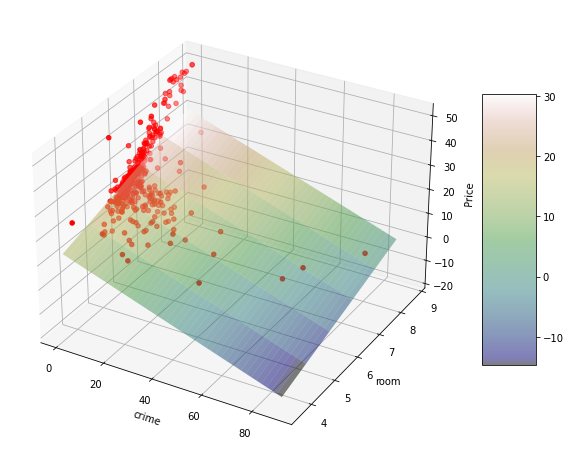

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


X_plan, Y_plan = np.meshgrid(np.arange(X_train[:,0].min(), X_train[:,0].max()),
                             np.arange(X_train[:,1].min(), X_train[:,1].max()))

Z = X_plan * model.w[0] + Y_plan * model.w[1]

mycmap = plt.get_cmap('gist_earth')
surf = ax.plot_surface(X_plan, Y_plan, Z, cmap = mycmap,  alpha = 0.5)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

ax.scatter(X_train[:,0], X_train[:,1], Y_train, c= 'red')

ax.set_xlabel('crime')
ax.set_ylabel('room')
ax.set_zlabel('Price')

plt.show()

